# Aula 1 - Representação de números e erros

### Aluno: Álvaro de Carvalho Alves, DRE: 118183211

# Inteiros
Temos vários tipos de inteiros na linguagem, cada um com um limite diferente. Representados em complemento a 2.

In [93]:
Int64 # vai de -9223372036854775808 até 9223372036854775807 (-2^63 até 2^63 - 1)

Int64

In [94]:
Int32 # Vai de -2147483648 até 2147483647 (-2^31 até 2^31 - 1)

Int32

In [95]:
Int16 # Vai de -32768 até 32767 (-2^15 até 2^15 - 1)

Int16

In [96]:
Int8 # Vai de -128 até 127 (-2^7 até 2^7 - 1)

Int8

In [97]:
Int8(120) + Int8(16) # Dá overflow

-120

In [98]:
BigInt # não tem limite, mas não está a nível de hardware, pode demorar no processamento

BigInt

# Floats

O overflow de float é quando o número é muito grande e já não é possível representar nem com a notação IEEE

In [99]:
10.0^308 # número muito grande mas ainda possível de representar

1.0e308

In [100]:
10.0^309 # Primeira potência de 10 que vai pra infinito

Inf

In [101]:
1 / Inf 

0.0

In [102]:
Inf / Inf
0 / 0
Inf - Inf # indeterminações são representadas por NaN

NaN

Algoritmo pra printar os menores números positivos possíveis de se representar

In [124]:
x = 1.0
while x > 0
    x = x / 2
    if x < 1.012e-320
        println("x = $x")
    end
end


x = 5.06e-321
x = 2.53e-321
x = 1.265e-321
x = 6.3e-322
x = 3.16e-322
x = 1.6e-322
x = 8.0e-323
x = 4.0e-323
x = 2.0e-323
x = 1.0e-323
x = 5.0e-324
x = 0.0


Vamos plottar um gráfico com as diferenças entre cada ponto flutuante

In [104]:
using Plots # importa a biblioteca com funções para plottar
gr(size=(400,300))

Plots.GRBackend()

In [105]:
x = Float16(0.0)
X = Float16[0.0] # vetor com os pontos flutuantes
D = Float16[0.0] # vetor com as diferenças entre um float e o seu sucessor

while x < Inf
    y = nextfloat(x)
    d = y - x
    x = y
    push!(X, x)
    push!(D, d)
end

In [106]:
scatter(X, D, ms=1, m=(stroke(0)), leg=false)

# Nos conjunto dos inteiros, a variação entre cada número é uma unidade
# No conjunto dos floats, essa variação vai depender do tamanho do número

# tive dificuldade de entender porque isso acontece pros numeros inteiros representados em float
# escrevi uma função pra printar os bits abaixo e analisar melhor, creio que tenha ficado mais claro, mas tô digerindo isso ainda

In [123]:
# função pra visualizar a implementação dos floats16 a nível de bit
function printaBitsSeparados(numero)
    sinal = bitstring(numero)[1]
    expoente = bitstring(numero)[2:6]
    mantissa = bitstring(numero)[7:end]
    
    println("$numero = $sinal  $expoente  $mantissa\n")
end

printaBitsSeparados (generic function with 1 method)

In [108]:
# fazendo uns testes pra entender melhor o gráfico acima

n1 = Float16(50000)
n2 = nextfloat(n1)
n3 = nextfloat(n2)
n4 = nextfloat(n3)

println("50000: Float = $n1, InteiroCorrespondente = $(Int(n1))") # a conversão para inteiro do 50000 vira 49984
printaBitsSeparados(n1) # aqui da pra ver os bits sendo incrementados na mantissa

println("Float = $n2, InteiroCorrespondente = $(Int(n2))") # o próximo numero inteiro possivel de representar é só o 50016!!! :o
printaBitsSeparados(n2)

println("Float = $n3, InteiroCorrespondente = $(Int(n3))")
printaBitsSeparados(n3)

println("Float = $n4, InteiroCorrespondente = $(Int(n4))")
printaBitsSeparados(n4)

50000: Float = 5.0e4, InteiroCorrespondente = 49984
5.0e4 = 0  11110  01000011010

Float = 5.002e4, InteiroCorrespondente = 50016
5.002e4 = 0  11110  01000011011

Float = 5.005e4, InteiroCorrespondente = 50048
5.005e4 = 0  11110  01000011100

Float = 5.008e4, InteiroCorrespondente = 50080
5.008e4 = 0  11110  01000011101



In [109]:
Float16(49984.0) == Float16(50000.0) # por quê?? Consegui entender melhor com o código acima
# Ele arredonda pra cima a partir do 50000 -> vira 50016

true

# Erro da máquina
Existe um epsilon na máquina que quando somado ao número não altera o seu valor

In [110]:
ϵ = 1.0

1.0

In [111]:
while 1 + ϵ > 1
    ϵ = ϵ / 2
end
ϵ = 2ϵ

2.220446049250313e-16

In [112]:
eps(Float64) # função da Julia que fornece o epsilon para cada precisão

2.220446049250313e-16

Soma não é associativa

In [113]:
(1 + 1e-16) + 1e-16

1.0

In [114]:
1 + (1e-16 + 1e-16)

1.0000000000000002

In [115]:
(0.1 + 0.2) + 0.3 == 0.1 + (0.2 + 0.3)

false

# Aproximando a derivada

$$ \frac{1}{2 \sqrt{x}} = \frac{d}{dx}\Big(\sqrt{x}\Big)|_{x = a} = \lim_{h \to 0} \frac{\sqrt{a + h} - \sqrt{a}}{h} \approx \frac{\sqrt{a + h} - \sqrt{a}}{h} = \frac{1}{\sqrt{a + h} + \sqrt{a}}$$

In [116]:
h = 10.0^(-15) # chuta um h muito pequeno
a = 1.0
1/2/sqrt(a) # valor exato da derivada

0.5

In [117]:
(sqrt(a + h) - sqrt(a)) / h # aproximação da derivada com um h muito pequeno

0.44408920985006256

In [118]:
2.0^(-50)

8.881784197001252e-16

In [119]:
plot(rand(3), rand(3))
nothing

In [120]:
erro1(h) = max(abs((sqrt(1+h) - 1) / h - 0.5), 1e-10)
erro2(h) = max(abs(1 / (sqrt(1+h) + 1) - 0.5), 1e-10)

valores_h = [2.0^p for p = range(-50, -10, length = 100)]

100-element Array{Float64,1}:
 8.881784197001252e-16
 1.1752452318843546e-15
 1.555094477000748e-15
 2.05771422575419e-15
 2.7227849481129307e-15
 3.602812179107667e-15
 4.767271688835618e-15
 6.308094406631722e-15
 8.346924119337791e-15
 1.1044720919321917e-14
 1.4614468568498932e-14
 1.933798899037776e-14
 2.5588191348813645e-14
 ⋮
 4.485273719102779e-5
 5.93495229691744e-5
 7.853179309139597e-5
 0.00010391393591070723
 0.00013749980296371979
 0.00018194090763059724
 0.00024074575494613463
 0.00031855682858447724
 0.0004215171023908815
 0.0005577550115548301
 0.0007380261705871365
 0.0009765625

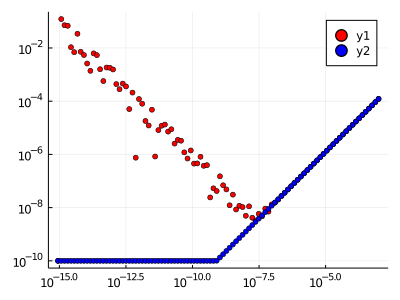

In [121]:
plot(xaxis=:log, yaxis=:log)
scatter!(valores_h, erro1.(valores_h), c=:red, ms=3)
scatter!(valores_h, erro2.(valores_h), c=:blue, ms=3)

O erro diminui conforme h diminui, mas chega num ponto que o erro volta a subir devido ao cancelamento catastrófico

Podemos evitar esse escalonamento do erro, fazendo a multiplicação por conjugado, então o erro continua diminuindo conforme o h diminui

# Big float
Assim como o BigInteger, é um float com precisão arbitrária, mas não funciona a nível de hardware e pode reduzir o desempenho do sistema

In [122]:
setprecision(2^11)
BigFloat(π)

3.14159265358979323846264338327950288419716939937510582097494459230781640628620899862803482534211706798214808651328230664709384460955058223172535940812848111745028410270193852110555964462294895493038196442881097566593344612847564823378678316527120190914564856692346034861045432664821339360726024914127372458700660631558817488152092096282925409171536436789259036001133053054882046652138414695194151160943305727036575959195309218611738193261179310511854807446237996274956735188575272489122793818301194912983367336244065664308602139494639522473719070217986094370277053921717629317675238467481846766940513200056812714526357